In [1]:
import pandas as pd
import Technic as tc
from Technic import TSFM

In [2]:
# pip freeze > requirements.txt

## Internal Data Loader

In [3]:
df_internal_raw = pd.read_excel('fake_internal.xlsx')
df_internal_raw.head()

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price
0,2018-01-31,1525.766256,0.054260,808.925168,0.018648,1022.483571,0.045600
1,2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520
2,2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023
3,2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759
4,2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131


In [4]:
df_internal_raw['VR_balance_GR'] = df_internal_raw['VR_balance'].pct_change()

In [5]:
ID_config = {
    'in_sample_start':"2018-02-28",
    'in_sample_end':"2022-12-31",
    'full_sample_end':"2023-11-30",
    'scen_p0':"2022-12-31",
}
IDLoader = tc.PPNRInternalLoader(**ID_config)
IDLoader.load(df_internal_raw, date_col='Date')

In [6]:
IDLoader.internal_data.tail()

,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price,VR_balance_GR
Date,,,,,,,
2023-07-31,2489.052561,0.033147,2518.590119,0.053016,2289.250500,0.035404,0.008653
2023-08-31,2509.747182,0.046901,2582.117434,0.050611,2314.268164,0.011812,0.010928
2023-09-30,2516.131131,0.050095,2612.826339,0.033226,2336.076344,0.024985,0.009423
2023-10-31,2532.723351,0.051663,2649.181996,0.039805,2352.850746,0.035034,0.007181
2023-11-30,2556.873350,0.051585,2683.722013,0.026095,2374.657724,0.030125,0.009268


## Mev Loader

In [7]:
mev_load = {
    'model_mev_source': {'fake_scens.xlsx': 'base'},
    'scen_mevs_source': {
        'fake_scens.xlsx': {'base':'base', 'adv':'adv', 'sev':'sev'}
    } 
}
mev_ldr = tc.MEVLoader()
mev_ldr.load(
    source='fake_scens.xlsx',
    sheet='base'
)

mev_ldr.load_scens(
    source='fake_scens.xlsx',
    scens={
        'Base': 'base',
        'Adv': 'adv',
        'Sev': 'sev'
    },
    set_name='EWST2024'
)

In [8]:
mev_ldr.model_mev_qtr

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [9]:
mev_ldr.model_mev_mth

""


In [10]:
mev_ldr.scen_mev_qtr['EWST2024']['Base']

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [11]:
mev_ldr.mev_map

{'NGDP': {'type': 'level',
  'description': 'Nominal GDP',
  'category': None,
  'aggregation': 'mean'},
 'PSR': {'type': 'rate',
  'description': 'Personal Savings Rate',
  'category': None,
  'aggregation': 'mean'},
 'PDI': {'type': 'level',
  'description': 'Personal Disposable Income',
  'category': None,
  'aggregation': 'mean'},
 'UNRATE': {'type': 'rate',
  'description': 'Unemployment Rate',
  'category': None,
  'aggregation': 'end'},
 'CPI': {'type': 'rate',
  'description': 'Consumer Price Index',
  'category': None,
  'aggregation': 'mean'}}

## Data Manager

In [12]:
dm_config = {
    'internal_loader': IDLoader,
    'mev_loader': mev_ldr,
}
dm = tc.DataManager(**dm_config)

In [13]:
dm.internal_in.head()

,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price,VR_balance_GR
Date,,,,,,,
2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520,0.018884
2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023,0.022306
2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759,0.025929
2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131,0.017233
2018-06-30,1599.492411,0.021060,920.614490,0.050508,1130.304390,0.011438,0.016941


In [14]:
dm.model_mev

,NGDP,PSR,PDI,UNRATE,CPI,M,Q
2000-01-31,100.380843,10026.667258,8054.808760,1.661834,3.744371,1,1
2000-02-29,100.117563,10043.730102,8043.563749,2.825715,2.507559,2,1
2000-03-31,99.981593,10027.312641,8044.007491,3.640000,2.988070,3,1
2000-04-30,99.718402,10030.001362,8039.922822,4.098958,2.641355,4,2
2000-05-31,99.737917,9991.426960,8046.284566,4.332339,3.970711,5,2
...,...,...,...,...,...,...,...
2030-08-31,104.756857,10543.852118,8317.840830,5.975238,3.742299,8,3
2030-09-30,104.853281,10520.634789,8306.576687,6.610000,4.300523,9,3
2030-10-31,105.004384,10480.785812,8287.327031,6.829526,5.375077,10,4
2030-11-30,105.031457,10475.904001,8284.904979,6.754855,5.556984,11,4


In [15]:
dm.scen_mevs['EWST2024']['Base']

,NGDP,PSR,PDI,UNRATE,CPI,M,Q
2000-01-31,100.380843,10026.667258,8054.808760,1.661834,3.744371,1,1
2000-02-29,100.117563,10043.730102,8043.563749,2.825715,2.507559,2,1
2000-03-31,99.981593,10027.312641,8044.007491,3.640000,2.988070,3,1
2000-04-30,99.718402,10030.001362,8039.922822,4.098958,2.641355,4,2
2000-05-31,99.737917,9991.426960,8046.284566,4.332339,3.970711,5,2
...,...,...,...,...,...,...,...
2030-08-31,104.756857,10543.852118,8317.840830,5.975238,3.742299,8,3
2030-09-30,104.853281,10520.634789,8306.576687,6.610000,4.300523,9,3
2030-10-31,105.004384,10480.785812,8287.327031,6.829526,5.375077,10,4
2030-11-30,105.031457,10475.904001,8284.904979,6.754855,5.556984,11,4


In [16]:
# Build Search Vars
var_lst = ['VR_price', 'NGDP', 'PDI']
df_dict = dm.build_search_vars(var_lst)
df_dict


e:\OneDrive\Git\Project_LEGO\Technic\data.py:1038: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


{'VR_price':             VR_price
 Date                
 2018-01-31  0.045600
 2018-02-28  0.023520
 2018-03-31  0.025023
 2018-04-30  0.013759
 2018-05-31  0.033131
 ...              ...
 2023-07-31  0.035404
 2023-08-31  0.011812
 2023-09-30  0.024985
 2023-10-31  0.035034
 2023-11-30  0.030125
 
 [71 rows x 1 columns],
 'NGDP':                NGDP_LV  NGDP_MMGR
 2000-01-31  100.380843        NaN
 2000-02-29  100.117563  -0.002623
 2000-03-31   99.981593  -0.001358
 2000-04-30   99.718402  -0.002632
 2000-05-31   99.737917   0.000196
 ...                ...        ...
 2030-08-31  104.756857   0.000831
 2030-09-30  104.853281   0.000920
 2030-10-31  105.004384   0.001441
 2030-11-30  105.031457   0.000258
 2030-12-31  105.024158  -0.000069
 
 [372 rows x 2 columns],
 'PDI':                  PDI_LV  PDI_MMGR
 2000-01-31  8054.808760       NaN
 2000-02-29  8043.563749 -0.001396
 2000-03-31  8044.007491  0.000055
 2000-04-30  8039.922822 -0.000508
 2000-05-31  8046.284566  0.000791
 ...

In [17]:
dm.model_mev['NGDP']

2000-01-31    100.380843
2000-02-29    100.117563
2000-03-31     99.981593
2000-04-30     99.718402
2000-05-31     99.737917
                 ...    
2030-08-31    104.756857
2030-09-30    104.853281
2030-10-31    105.004384
2030-11-30    105.031457
2030-12-31    105.024158
Freq: M, Name: NGDP, Length: 372, dtype: float64

In [18]:
# Apply to MEVs
def new_features(df_mev, df_in):
    df_mev['NGDP-Price'] =  df_mev['NGDP'] - df_in['VR_price']
    df_mev['PDI-FixBal'] =  df_mev['PDI'] - df_in['Fixed_balance']

    df_in['VR_Bal-Price'] =  df_in['VR_balance'] - df_in['VR_price']
    df_in['Fixed_Bal-Price'] =  df_in['Fixed_balance'] - df_in['Fixed_price']

    return df_mev, df_in

dm.apply_to_all(new_features)

e:\OneDrive\Git\Project_LEGO\Technic\data.py:1384: UserWarning: apply_to_all(): No scenario internal data for EWST2024/Adv; skipping this scenario.
  warnings.warn(
e:\OneDrive\Git\Project_LEGO\Technic\data.py:1384: UserWarning: apply_to_all(): No scenario internal data for EWST2024/Sev; skipping this scenario.
  warnings.warn(
e:\OneDrive\Git\Project_LEGO\Technic\data.py:1384: UserWarning: apply_to_all(): No scenario internal data for EWST2024/Base; skipping this scenario.
  warnings.warn(


In [19]:
dm.model_mev.dropna()

,NGDP,PSR,PDI,UNRATE,CPI,M,Q,NGDP-Price,PDI-FixBal
2018-01-31,103.093203,10300.792330,8182.487391,4.552795,5.758384,1,1,103.047602,6656.721135
2018-02-28,103.059015,10321.330587,8192.470633,5.961332,7.104080,2,1,103.035495,6651.955160
2018-03-31,102.997783,10329.087083,8199.361976,6.980000,8.077535,3,1,102.972760,6632.893997
2018-04-30,102.904846,10359.537077,8225.011476,6.546695,12.399563,4,2,102.891087,6661.881712
2018-05-31,102.883079,10333.199045,8204.609777,5.216383,9.619620,5,2,102.849947,6620.726696
...,...,...,...,...,...,...,...,...,...
2023-07-31,104.099580,10252.899675,8201.221145,7.512735,4.698139,7,3,104.064176,5712.168584
2023-08-31,103.880878,10317.260429,8194.281610,7.035848,5.288646,8,3,103.869066,5684.534428
2023-09-30,103.629542,10391.969896,8201.677245,6.120000,5.643215,9,3,103.604557,5685.546114
2023-10-31,103.049009,10536.609725,8208.277469,4.810268,6.024794,10,4,103.013975,5675.554118


In [20]:
dm._mev_loader.scen_mev_qtr['EWST2024']['Base'].dropna()

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [21]:
dm.scen_mevs['EWST2024']['Sev'].dropna()

,NGDP,PSR,PDI,UNRATE,CPI,M,Q
2000-01-31,120.451536,9023.997747,9665.767840,1.446576,4.486109,1,1
2000-02-29,120.140262,9039.353734,9652.275317,2.520037,3.002736,2,1
2000-03-31,119.978202,9024.578519,9652.806842,3.270000,3.581156,3,1
2000-04-30,119.666681,9026.998516,9647.905752,3.691235,3.167219,4,2
2000-05-31,119.687418,8992.282501,9655.537164,3.903280,4.763019,5,2
...,...,...,...,...,...,...,...
2030-08-31,125.705999,9489.473280,9981.411217,5.377098,4.496849,8,3
2030-09-30,125.824758,9468.577809,9967.891188,5.950000,5.166210,9,3
2030-10-31,126.010733,9432.714309,9944.786963,6.147874,6.454238,10,4
2030-11-30,126.044136,9428.320543,9941.879589,6.080096,6.672273,11,4


In [22]:
dm._internal_loader.in_sample_end

Timestamp('2022-12-31 00:00:00')

In [23]:
dm.poos_dms['poos_dm_3']._internal_loader.in_sample_end

Timestamp('2022-09-30 00:00:00')

In [24]:
dm.out_sample_idx

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [25]:
dm.poos_dms['poos_dm_12'].out_sample_idx

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

## Model Building

### CM

In [26]:
cm_config = {
    'model_id': 'cm1',
    'target': 'VR_balance_GR',
    'model_type': tc.Growth,
    'target_base': 'VR_balance',
    'data_manager': dm,
    'model_cls': tc.OLS
}
cm1 = tc.CM(**cm_config)

In [27]:
m_dum = tc.DumVar('M', categories=[2,3,4])
indep_vars = [m_dum, 'NGDP']
cm1.build(indep_vars)

=== In-Sample Performance ===
   R²  Adj R²    ME   MAE  RMSE
0.253   0.197 0.010 0.003 0.004

=== Out-of-Sample Performance ===
   ME   MAE  RMSE
0.008 0.003 0.004

=== Model Parameters ===
Variable    Coef Pvalue  VIF     SE  CI_2_5 CI_97_5
   const  0.6297  0.003  NaN 0.2029  0.2230  1.0364
    NGDP -0.0060  0.004 1.17 0.0020 -0.0099 -0.0020
     M:2 -0.0049  0.050 1.16 0.0024 -0.0097  0.0000
     M:3 -0.0024  0.273 1.06 0.0022 -0.0067  0.0019
     M:4  0.0023  0.269 1.02 0.0020 -0.0018  0.0063


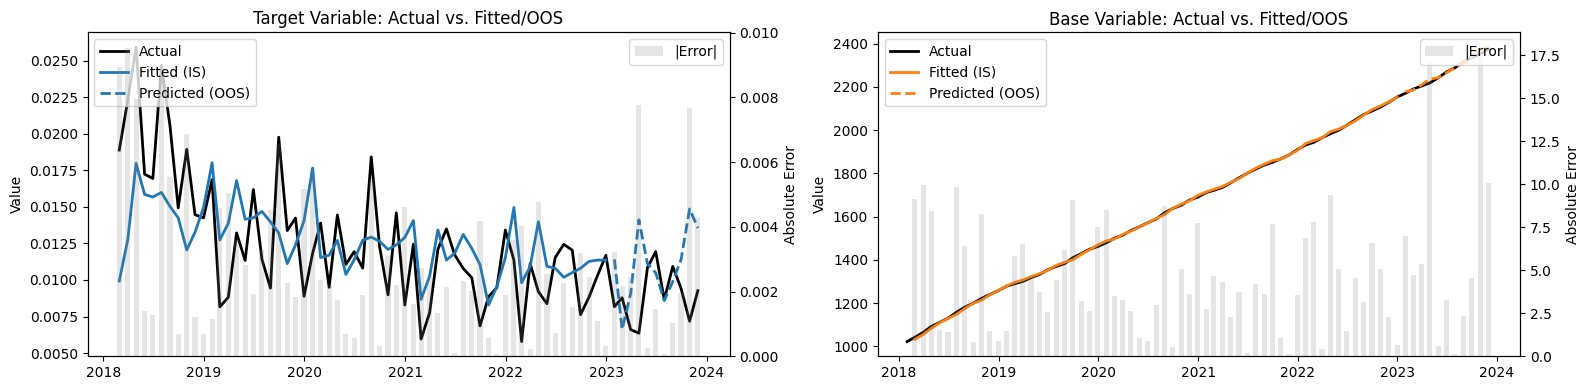


=== Model Testing ===
--- Fit Measures ---
           Value
Metric          
R²      0.252768
Adj R²  0.197418

--- IS Error Measures ---
           Value
Metric          
ME      0.009537
MAE     0.002961
RMSE    0.003753

--- OOS Error Measures ---
           Value
Metric          
ME      0.007755
MAE     0.002943
RMSE    0.003883

--- In-Sample R-sq ---
Metric
R²    0.252768

--- Coefficient Significance ---
              P-value  Passed
Coefficient                  
M:2          0.050020    True
M:3          0.272972   False
M:4          0.269451   False
NGDP         0.003586    True

--- Multicollinearity ---
               VIF
Variable          
NGDP      1.168244
M:2       1.155725
M:3       1.064225
M:4       1.019384

--- Residual Stationarity ---
      Statistic   P-value  Passed
Test                             
ADF   -5.262432  0.000007    True
PP    -5.176059  0.000010    True

--- Residual Normality ---
      Statistic   P-value  Passed
Test                             

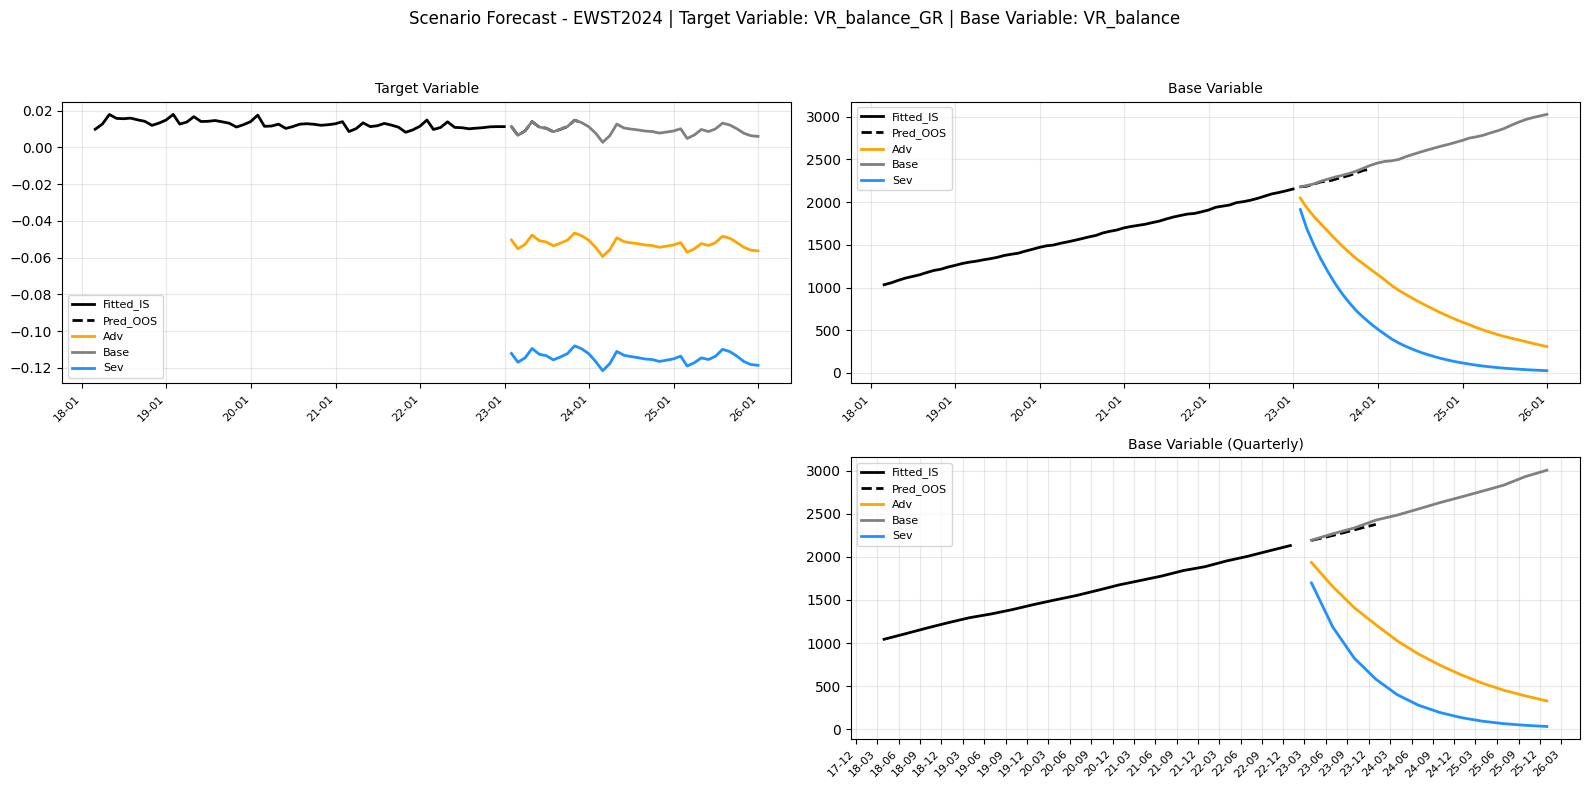

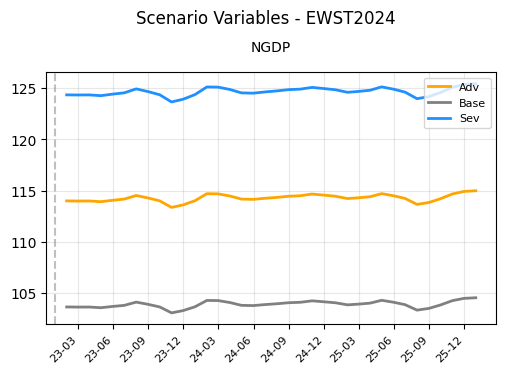


=== Model: cm1 — Sensitivity Analysis ===
Parameter Sensitivity Testing


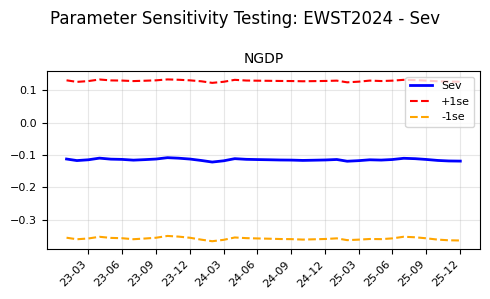

Input Sensitivity Testing


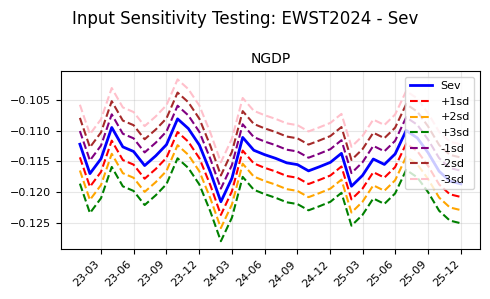


=== Model: cm1 — Model Stability Analysis ===
1. Performance Plots:


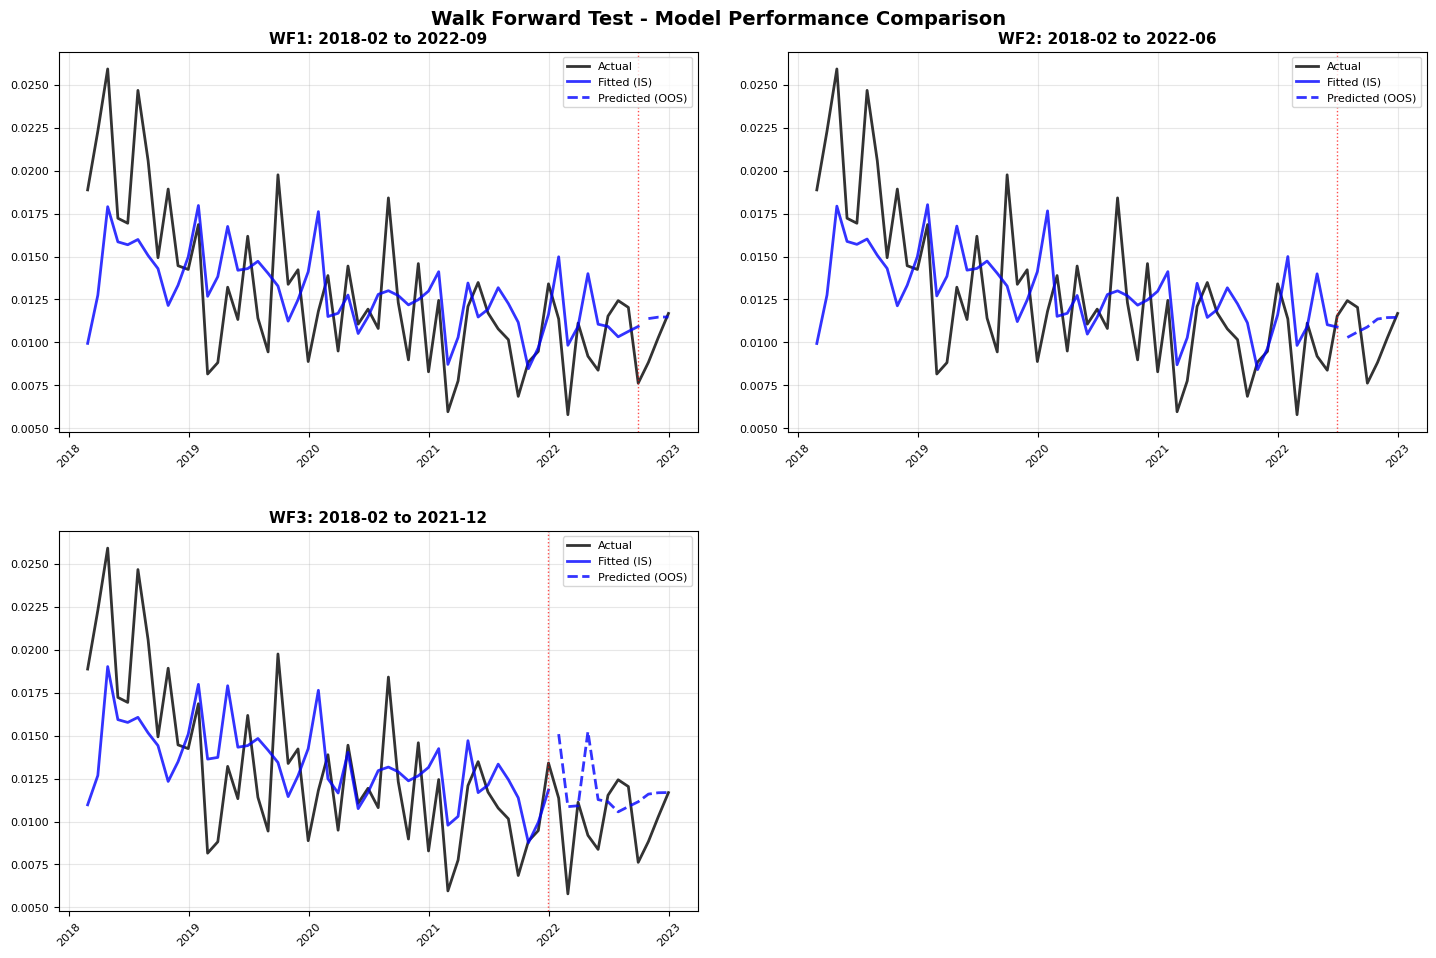


2. Parameter Coefficients Table:
        2022-12   2022-09   2022-06   2021-12
const  0.629670  0.615360  0.622035  0.597994
NGDP  -0.005966 -0.005827 -0.005892 -0.005657

3. Parameter Percentage Change Table:
        2022-09   2022-06   2021-12
const -0.022727 -0.012124 -0.050305
NGDP  -0.023328 -0.012492 -0.051750

4. P-Values Table:
        2022-12   2022-09   2022-06   2021-12
const  0.003037  0.003936  0.005727  0.009266
NGDP   0.003586  0.004636  0.006673  0.010713

5. Model Performance Comparison:
In-Sample End  PoOS Period  IS R-Square  IS RMSE  OOS RMSE
      2022-12            0     0.252768 0.003753       NaN
      2022-09            3     0.243927 0.003835  0.001630
      2022-06            6     0.239710 0.003900  0.002049
      2021-12           12     0.231497 0.003955  0.003051



In [28]:
cm1.show_report(show_tests=True, show_scens=True, show_sens=True, show_stab=True)

=== In-Sample Performance ===
   R²  Adj R²    ME   MAE  RMSE
0.171   0.110 0.010 0.003 0.004

=== Out-of-Sample Performance ===
   ME   MAE  RMSE
0.011 0.005 0.006

=== Model Parameters ===
    Variable        Coef Pvalue  VIF         SE  CI_2_5 CI_97_5
       const      0.0113  0.000  NaN 7.7102e-04  0.0098  0.0129
         M:2     -0.0026  0.283 1.02     0.0024 -0.0075  0.0022
         M:3 -6.5382e-04  0.761 1.02     0.0021 -0.0049  0.0036
         M:4      0.0030  0.178 1.04     0.0022 -0.0014  0.0075
NGDP_BO_func  3.0194e-05  0.074 1.03 1.6564e-05 -0.0000  0.0001


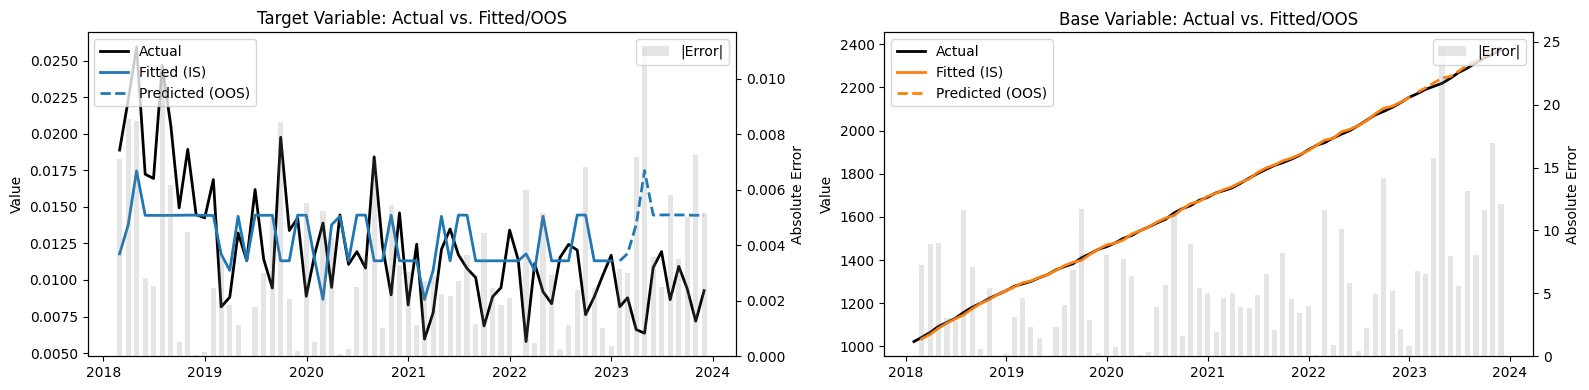

In [29]:
# cm1_b
cm_config = {
    'model_id': 'cm1',
    'target': 'VR_balance_GR',
    'model_type': tc.Growth,
    'target_base': 'VR_balance',
    'data_manager': dm,
    'model_cls': tc.OLS
}
cm1_b = tc.CM(**cm_config)
# NGDP_bo2 = tc.BO('NGDP', 'VR_balance_GR', cond_thresh=0.0068, cond_thresh_sign='<', effect_periods=2)
NGDP_bo2 = tc.BO('NGDP', 'VR_balance_GR', cond_thresh=0.011, cond_thresh_sign='<', effect_periods=2)

m_dum = tc.DumVar('M', categories=[2,3,4])
indep_vars = [m_dum, NGDP_bo2]
cm1_b.build(indep_vars)
cm1_b.show_report()

In [30]:
cm1_b.model_in.X_full.to_csv('cm1_b_x.csv')
cm1_b.model_in.y_full.to_csv('cm1_b_y.csv')

In [31]:
bo_model = cm1_b.model_in
X_test_1 = bo_model.X_full['2023-01-01':]
X_test_1

,M:2,M:3,M:4,NGDP_BO_func
Date,,,,
2023-01-31,0.0,0.0,0.0,0.0
2023-02-28,1.0,0.0,0.0,0.0
2023-03-31,0.0,1.0,0.0,0.0
2023-04-30,0.0,0.0,1.0,0.0
2023-05-31,0.0,0.0,0.0,0.0
2023-06-30,0.0,0.0,0.0,0.0
2023-07-31,0.0,0.0,0.0,0.0
2023-08-31,0.0,0.0,0.0,0.0
2023-09-30,0.0,0.0,0.0,0.0


In [32]:
cm_config = {
    'model_id': 'cm2',
    'target': 'VR_balance',
    'model_cls': tc.OLS,
    'data_manager': dm
}
cm2 = tc.CM(**cm_config)

m_dum = tc.DumVar('M')
indep_vars = [m_dum, 'NGDP', 'CPI', 'PSR']
cm2.build(indep_vars)#, outlier_idx=['2018-04-30', '2018-05-31'])

=== In-Sample Performance ===
   R²  Adj R²      ME     MAE    RMSE
0.731   0.646 530.909 120.794 164.136

=== Out-of-Sample Performance ===
      ME     MAE    RMSE
1090.811 373.801 485.092

=== Model Parameters ===
Variable        Coef Pvalue  VIF         SE       CI_2_5     CI_97_5
   const -94697.1524  0.000  NaN 10178.8727 -115211.3224 -74182.9824
    NGDP    857.4038  0.000 1.72   101.6583     652.5249   1062.2827
     CPI    -26.9452  0.030 1.28    12.0354     -51.2010     -2.6895
     PSR      0.8054  0.220 1.34     0.6480      -0.5006      2.1114
     M:2   -214.5617  0.084 2.08   121.2055    -458.8354     29.7119
     M:3   -363.3098  0.000 2.16    77.5188    -519.5388   -207.0809
     M:4   -557.7556  0.000 2.44    87.3235    -733.7445   -381.7666
     M:5   -563.6001  0.000 2.48    73.5381    -711.8064   -415.3939
     M:6   -507.6638  0.000 2.41    65.2434    -639.1532   -376.1745
     M:7   -368.9285  0.000 2.35    84.7550    -539.7409   -198.1161
     M:8   -425.0294  0.

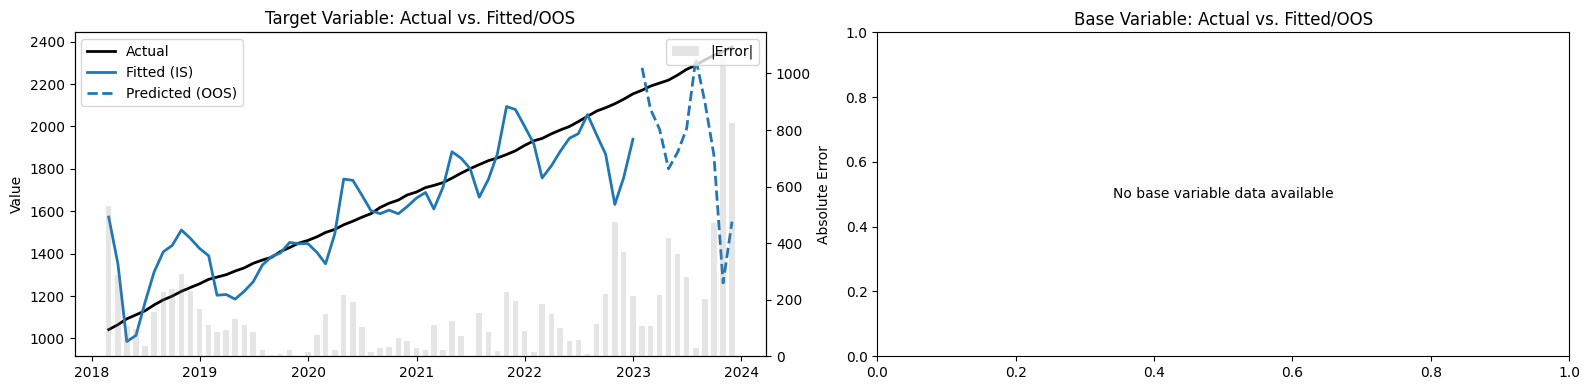


=== Model Testing ===
--- Fit Measures ---
           Value
Metric          
R²      0.731209
Adj R²  0.645684

--- IS Error Measures ---
             Value
Metric            
ME      530.908973
MAE     120.794329
RMSE    164.135982

--- OOS Error Measures ---
              Value
Metric             
ME      1090.811314
MAE      373.801363
RMSE     485.092465

--- In-Sample R-sq ---
Metric
R²    0.731209

--- Coefficient Significance ---
                  P-value  Passed
Coefficient                      
NGDP         9.683257e-11    True
CPI          3.027295e-02    True
PSR          2.204992e-01   False

--- Group Driver F-Test M:2'3'4'5'6'7'8'9'10'11'12 ---
              F-statistic       P-value  Passed
Test                                           
Joint F Test     8.807189  5.478362e-08    True

--- Multicollinearity ---
               VIF
Variable          
NGDP      1.721272
CPI       1.278011
PSR       1.340839
M:2       2.076363
M:3       2.162777
M:4       2.440974
M:5      

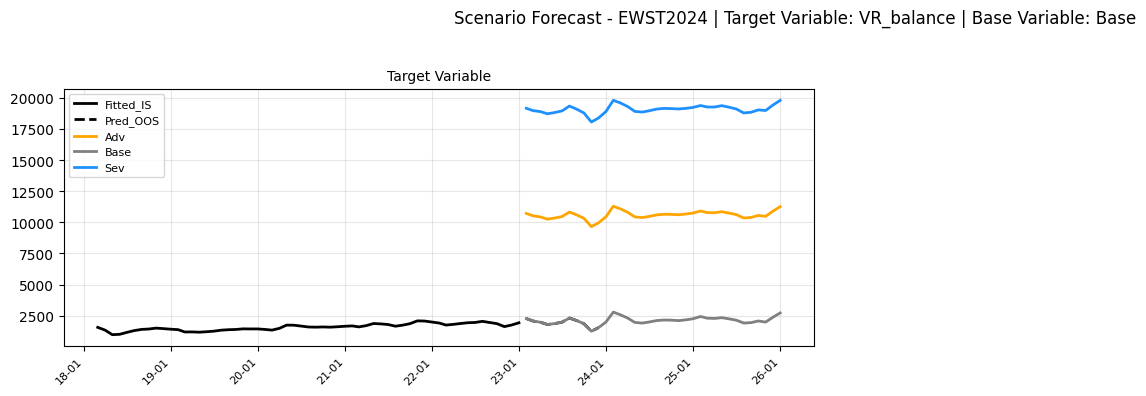

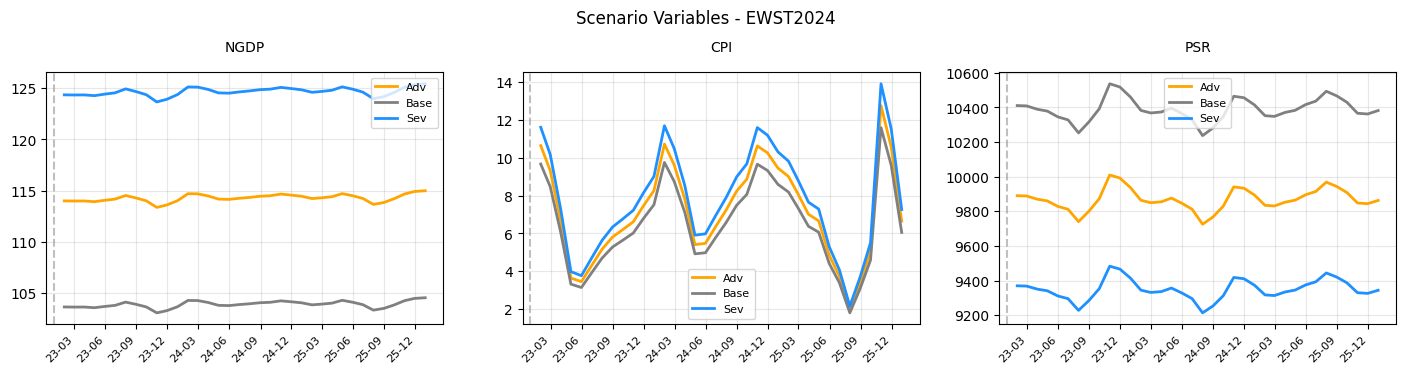

In [33]:
cm2.show_report(show_tests=True, show_scens=True)

### Segment

In [34]:
seg_config = {
    'segment_id': 'VR',
    'target': 'VR_balance_GR',
    'model_type': tc.Growth,
    'target_base': 'VR_balance',
    'data_manager': dm,
    'model_cls': tc.OLS
}

seg1 = tc.Segment(**seg_config)

In [35]:
# Adding benchmark model
specs = ['NGDP', 'CPI']
params = {
  'NGDP': -0.006,
  'CPI': 0.0001,
  'const':  0.78
}

seg1.add_benchmark_cm(
  cm_id='bench',
  specs=specs,
  fixed_params=params
)

OLS-Fixed:VR_balance_GR~C+NGDP+CPI

In [36]:
# cm1
m_dum = tc.DumVar('M', categories=[2,3,4])
indep_vars = [m_dum, 'NGDP']
seg1.build_cm('cm1',indep_vars)

OLS-HAC(3):VR_balance_GR~C+NGDP+M:2+M:3+M:4

In [37]:
# cm2
m_dum = tc.DumVar('M')
indep_vars = [m_dum, 'NGDP', 'CPI', 'PSR']
seg1.build_cm('cm2',indep_vars)

OLS-HAC(3):VR_balance_GR~C+NGDP+CPI+PSR+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12

=== Candidate Models to Report ===
- bench: OLS-Fixed:VR_balance_GR~C+NGDP+CPI
- cm1: OLS-HAC(3):VR_balance_GR~C+NGDP+M:2+M:3+M:4
- cm2: OLS-HAC(3):VR_balance_GR~C+NGDP+CPI+PSR+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12


=== In-Sample Performance ===
             R²    Adj R²    ME   MAE  RMSE
Model                                      
bench -1161.006 -1202.506 0.157 0.148 0.148
cm1       0.253     0.197 0.010 0.003 0.004
cm2       0.343     0.134 0.009 0.003 0.004

=== Out-of-Sample Performance ===
Metric    ME   MAE  RMSE
Model                   
bench  0.155 0.150 0.150
cm1    0.008 0.003 0.004
cm2    0.010 0.003 0.004

=== Performance Plot ===


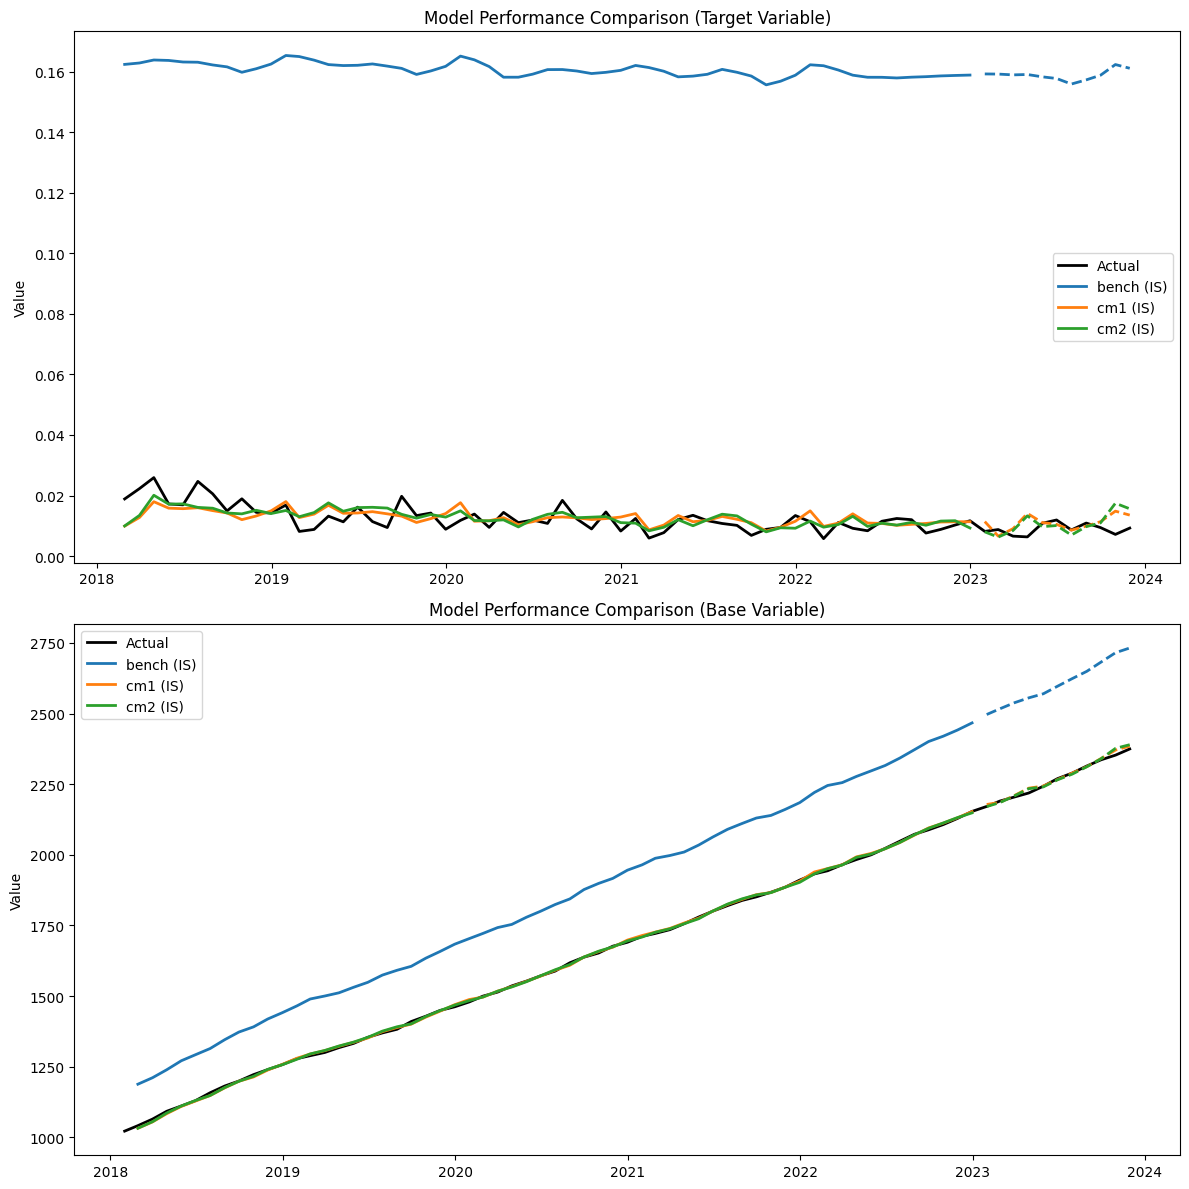


=== Model: bench — Parameters ===
Empty DataFrame
Columns: []
Index: []

=== Model: cm1 — Parameters ===
  Variable      Coef    Pvalue       VIF        SE    CI_2_5       CI_97_5
0    const  0.629670  0.003037       NaN  0.202856  0.222968  1.036371e+00
1     NGDP -0.005966  0.003586  1.168244  0.001959 -0.009894 -2.038863e-03
2      M:2 -0.004870  0.050020  1.155725  0.002429 -0.009741  4.405151e-07
3      M:3 -0.002394  0.272972  1.064225  0.002162 -0.006728  1.939737e-03
4      M:4  0.002257  0.269451  1.019384  0.002022 -0.001798  6.311246e-03

=== Model: cm2 — Parameters ===
   Variable      Coef    Pvalue       VIF        SE    CI_2_5   CI_97_5
0     const  0.769822  0.009280       NaN  0.282888  0.199699  1.339946
1      NGDP -0.007776  0.000505  1.721272  0.002070 -0.011948 -0.003603
2       CPI  0.000203  0.537740  1.278011  0.000326 -0.000455  0.000860
3       PSR  0.000004  0.745567  1.340839  0.000012 -0.000021  0.000029
4       M:2 -0.001578  0.575351  2.076363  0.002795

In [38]:
seg1.show_report(show_params=True)

e:\OneDrive\Git\Project_LEGO\Technic\data.py:1038: UserWarning: No type mapping for variables: ['VR_price', 'Fixed_price'], using raw-only
  warnings.warn(


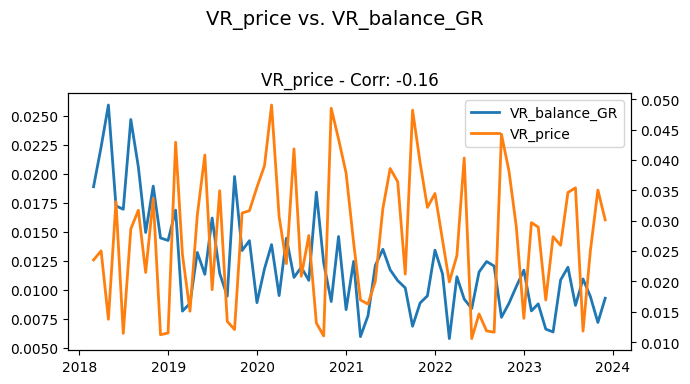

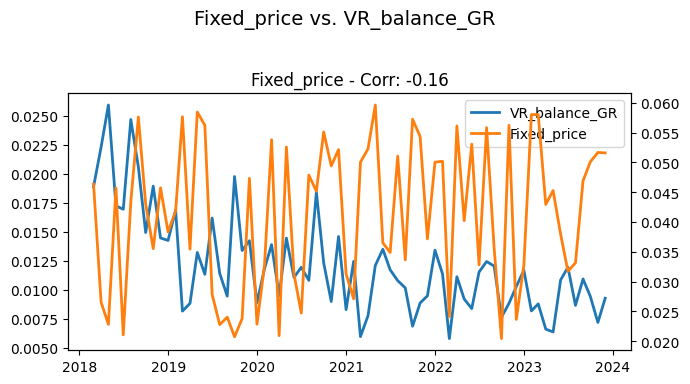

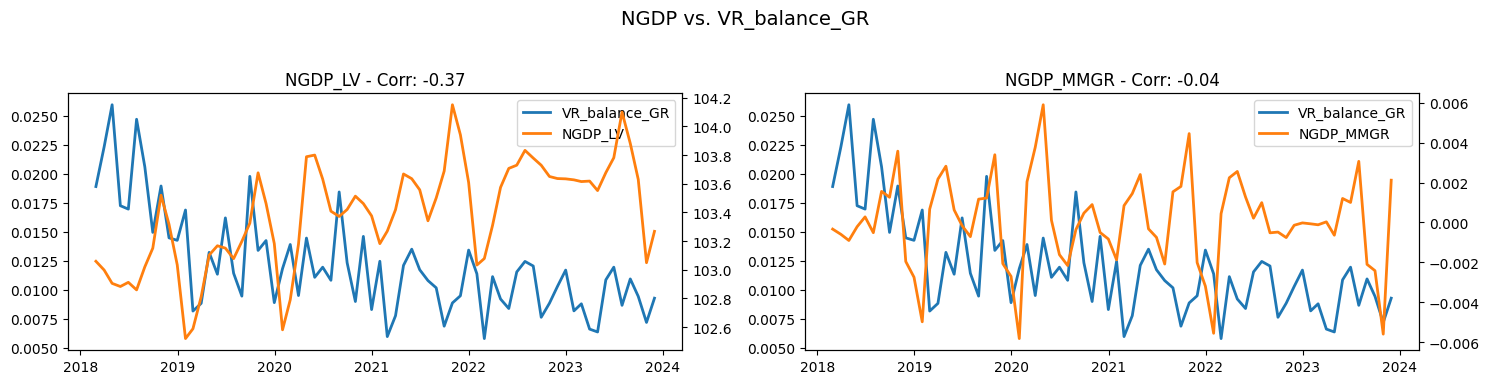

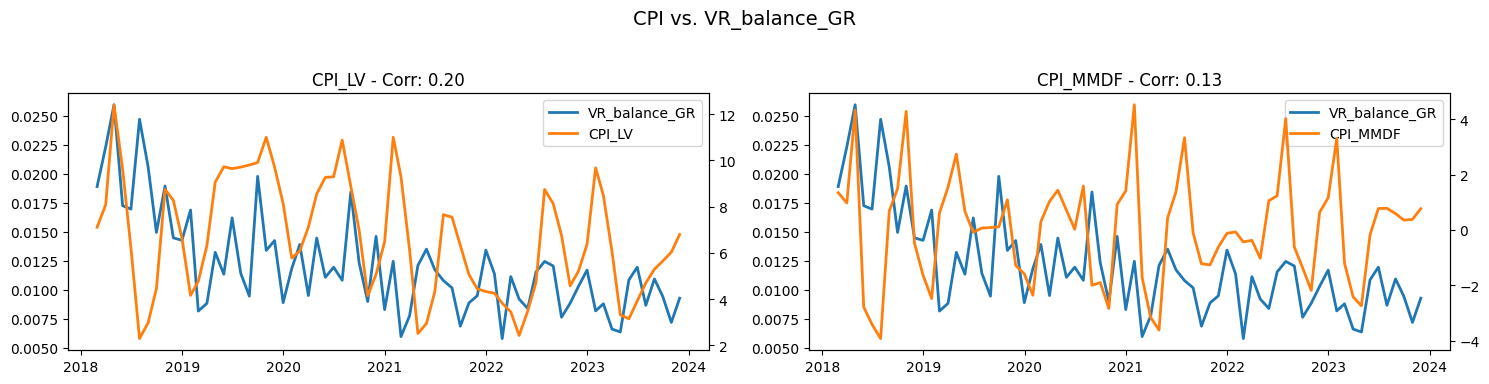

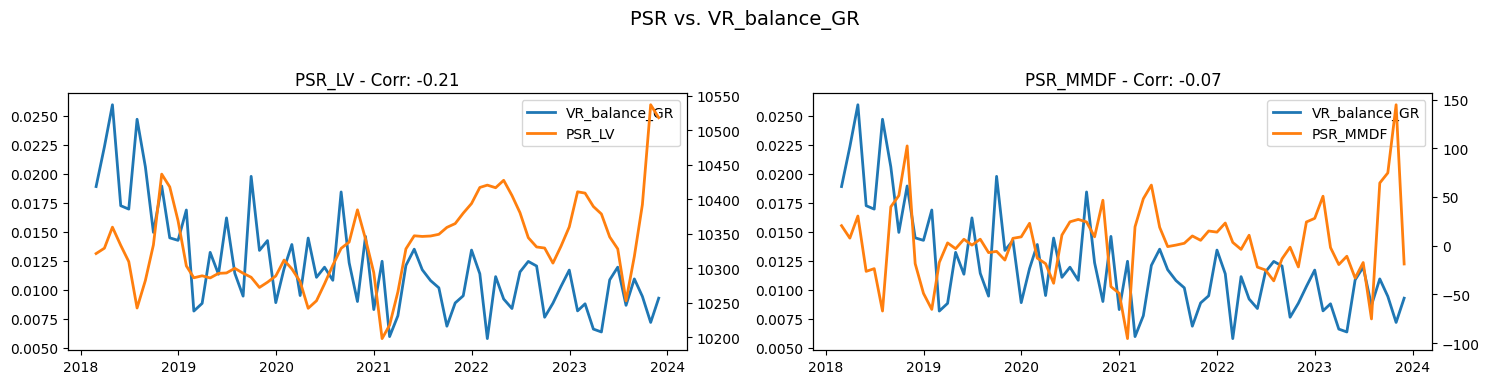

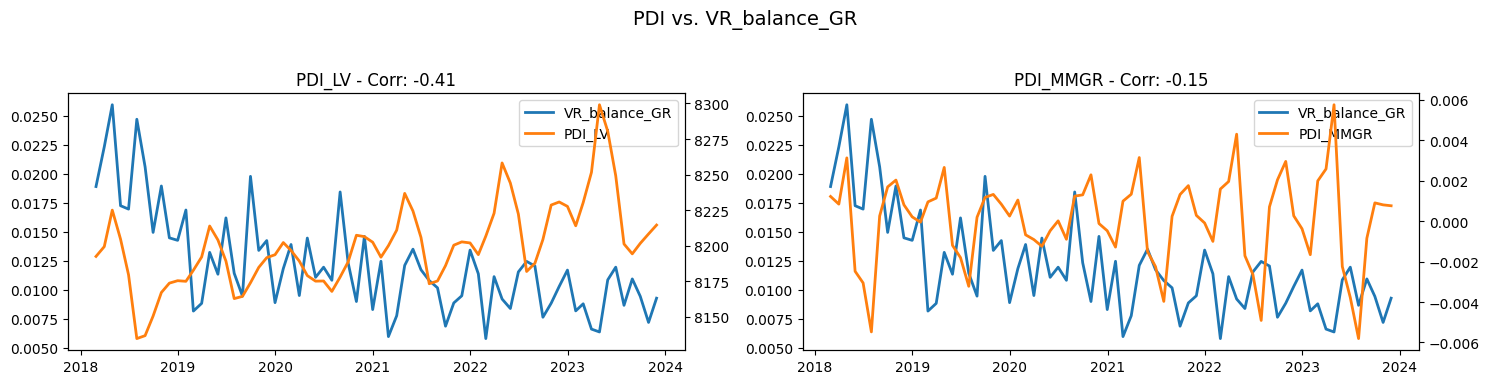

e:\OneDrive\Git\Project_LEGO\Technic\data.py:1038: UserWarning: No type mapping for variables: ['VR_price', 'Fixed_price'], using raw-only
  warnings.warn(


In [39]:
# Explore Vars
vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
df_corr = seg1.explore_vars(vars_list, 
                        # plot_type='scatter'
                        )

In [40]:
forced_in = [tc.DumVar('M')]
desired_pool = ['PDI', 'PSR', 'NGDP']#, 'UNRATE', 'CPI']
seg1.search_cms(desired_pool=desired_pool, forced_in=forced_in)

=== ModelSearch Configuration ===
Target          : VR_balance_GR
Model class     : OLS
Desired pool    : ['PDI', 'PSR', 'NGDP']
Forced in       : [DumVar:M]
Sample          : in
Max var num     : 5
Max lag         : 3
Max periods     : 3
Category limit  : 1
Exp sign map    : None
Top N           : 10
Rank weights    : (1, 1, 1)
Test update func: None
Outlier idx     : None


Built 4913 spec combinations.


--- Active Tests of Filtering ---                                                                                       
- Group Driver F-Test M:2'3'4'5'6'7'8'9'10'11'12: filter_mode: moderate | desc: F-test p < 0.1 for group ['M:2', 'M:3', 'M:4', 'M:5', 'M:6', 'M:7', 'M:8', 'M:9', 'M:10', 'M:11', 'M:12'].
- In-Sample R-sq: filter_mode: moderate | desc: Require R² ≥ 0.3.
- Multicollinearity: filter_mode: moderate | desc: Threshold = 10
- Residual Stationarity: filter_mode: moderate | desc: At least half of stationarity tests must pass.
- Coefficient Significance: filter_mode: modera

KeyboardInterrupt: 

In [ ]:
# seg1.show_report(show_params=True, show_tests=True)

In [ ]:
# seg1.cms['cm2'].show_report()

In [ ]:
# CM1
indep_vars = ['NGDP']
seg1.build_cm('cm1', indep_vars)

OLS-HAC(3):VR_balance~C+NGDP

In [ ]:
# CM2
m_dum = tc.DumVar('M')
indep_vars = [m_dum, 'NGDP']
seg1.build_cm('cm2', indep_vars)

OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12

In [ ]:
from Technic import GR2
# CM3
m_dum = tc.DumVar('M', categories=[2,3,4,5,6,7])
tsfm_var = [TSFM('PSR', 'GR2')]

indep_vars = [m_dum, 'NGDP', tsfm_var]
seg1.build_cm('cm3', indep_vars)

OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_MMGR2

In [ ]:
# seg1.cms['cm3'].model_in.testset.tests[3].test_result

In [ ]:
# from TECHNIC import GR2
# # CM4
# m_dum = tc.DumVar('M', mode='group', categories=[(2,3,4),5,6,7])
# tsfm_var = [TSFM('PSR', 'GR2')]

# indep_vars = [m_dum, 'NGDP', tsfm_var]
# seg1.build_cm('cm4', indep_vars)

=== Candidate Models to Report ===
- cm1: OLS-HAC(3):VR_balance~C+NGDP
- cm2: OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12
- cm3: OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_MMGR2


=== In-Sample Performance ===
         R²  Adj R²      ME     MAE    RMSE
Model                                      
cm1   0.582   0.575 513.446 167.665 204.682
cm2   0.686   0.603 506.517 135.983 177.538
cm3   0.709   0.662 396.106 133.229 170.781

=== Out-of-Sample Performance ===


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Metric      ME     MAE    RMSE
Model                         
cm1    724.093 407.900 424.200
cm2    841.290 323.480 382.935
cm3    963.937 354.942 423.198

=== Performance Plot ===


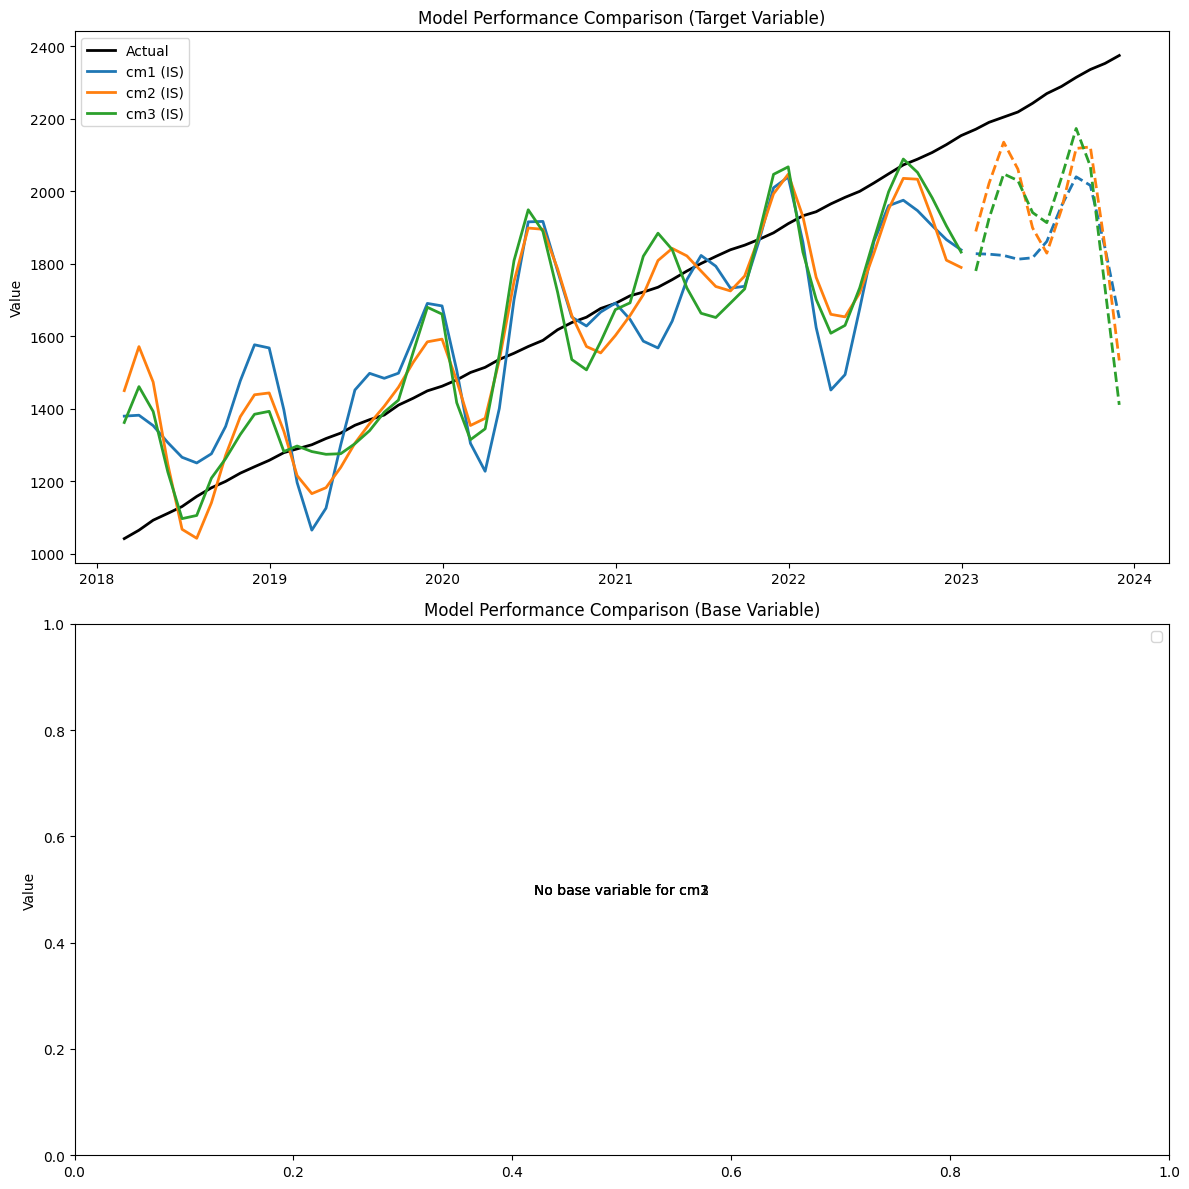


=== Model: cm1 — Parameters ===
  Variable          Coef        Pvalue  VIF            SE         CI_2_5       CI_97_5
0    const -78301.749723  1.092747e-07  NaN  12893.867084 -104121.273180 -52482.226266
1     NGDP    773.255343  6.775415e-08  1.0    124.737787     523.472233   1023.038452

=== Model: cm2 — Parameters ===
   Variable           Coef        Pvalue       VIF            SE         CI_2_5       CI_97_5
0     const -100637.173215  2.046538e-12       NaN  10596.702467 -121967.228935 -79307.117496
1      NGDP     989.385613  1.247820e-12  1.468251    102.525896     783.011689   1195.759537
2       M:2     134.249192  1.929498e-01  2.125486    101.607069     -70.275229    338.773613
3       M:3     252.533010  6.897947e-02  2.194805    135.615040     -20.445906    525.511926
4       M:4     191.299614  1.085522e-01  2.136672    116.893064     -43.993921    426.593148
5       M:5      24.256066  7.716707e-01  2.065070     83.095390    -143.006279    191.518410
6       M:6    

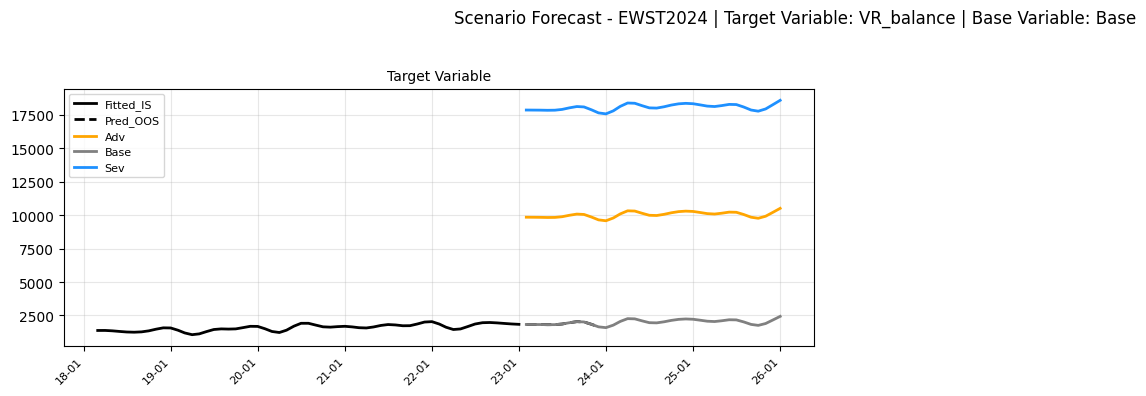

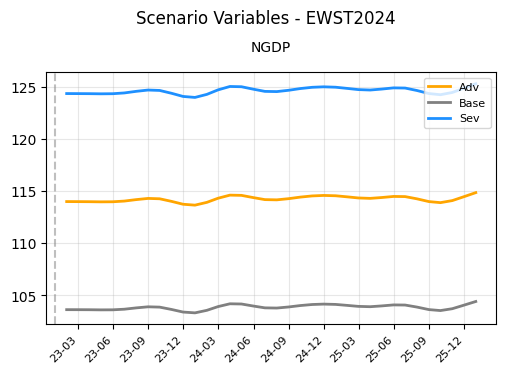


=== Model: cm2 — Scenario Analysis ===
Scenario plots for EWST2024 generated successfully.


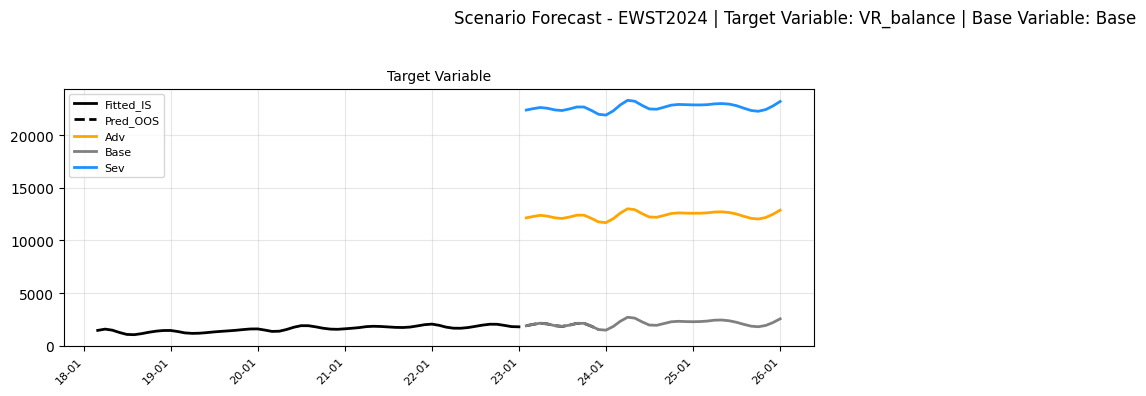

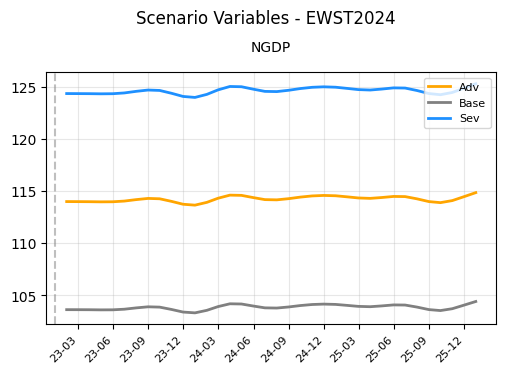


=== Model: cm3 — Scenario Analysis ===
Scenario plots for EWST2024 generated successfully.


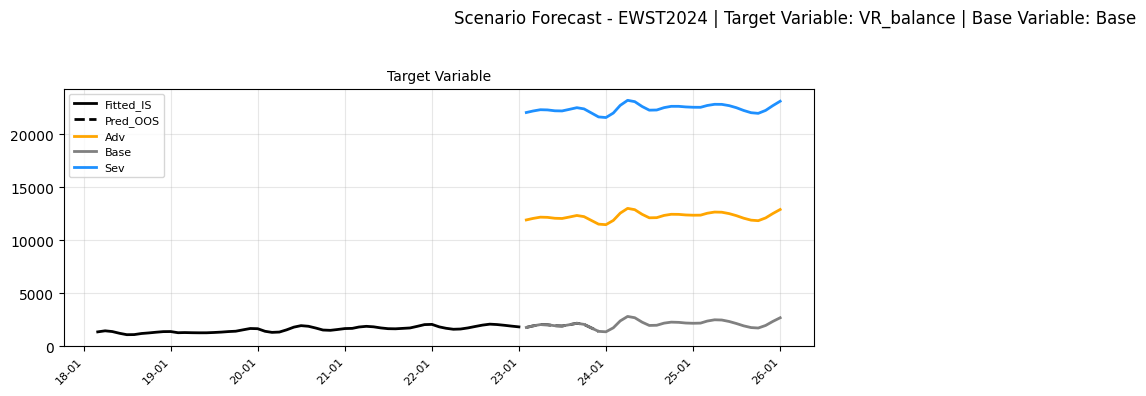

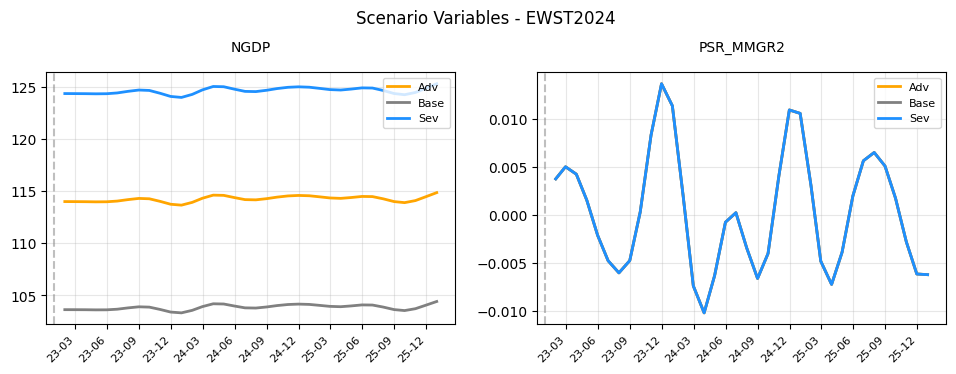

In [ ]:
seg1.show_report(show_params=True, show_tests=True, show_scens=True)

In [ ]:
vr_95 = seg1.dm.internal_data['VR_balance'].quantile(0.90)
vr_95

2218.766721015874

In [ ]:
from Technic import CondVar, BO
#cm4 with CondVars
mth_var = [tc.DumVar('M', categories=[2,3,4,5,6,7])]
tsfm_var = [TSFM('PSR', GR2)]
cond_var = CondVar('VR_price', 'VR_balance', BO, {'threshold': vr_95})

indep_vars = [mth_var, 'NGDP', tsfm_var, cond_var]
seg1.build_cm('cm4', indep_vars)

TypeError: __init__() got an unexpected keyword argument 'threshold'

In [ ]:
(seg1.cms['cm4'].model_full.y > vr_95).loc[lambda x: x==1]

Date
2023-05-31    True
2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, Name: VR_balance, dtype: bool

In [ ]:
tf = (seg1.cms['cm4'].model_full.X.VR_price_BO - seg1.dm.internal_data.VR_price) != 0
tf.loc[lambda x: x==1]

Date
2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, dtype: bool

In [ ]:
cm = seg1.cms['cm4']
cm.model_in.testset.filter_pass(fast_filter=False)

(False,
 ['Coefficient Significance', 'Residual Stationarity', 'Y–X Cointegration'])

In [ ]:
cm.model_in.testset.print_test_info()

Active Tests:
- In-Sample R² | filter_mode: moderate | desc: Require R² ≥ 0.3.
- Coefficient Significance | filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- Multicollinearity | filter_mode: moderate | desc: Threshold = 10
- Residual Stationarity | filter_mode: moderate | desc: At least half of stationarity tests must pass.
- Y–X Cointegration | filter_mode: moderate | desc: At least half of tests must show X variables are non-stationary and residuals are stationary.
- Sign Check | filter_mode: moderate | desc: All coefficients must have expected signs.

Inactive Tests:
- Fit Measures
- IS Error Measures
- OOS Error Measures
- Residual Normality
- Residual Autocorrelation
- Residual Heteroscedasticity
- Y Stationarity

Note: These tests are included but not turned on. Set `filter_on=True` on a test to include it in filter_pass results.


### Test

In [ ]:
seg1.cms['cm4'].model_in.testset.filter_pass(fast_filter=False)

(False,
 ['Common Driver Significance',
  "Group Driver F-Test M:2'3'4'5'6'7",
  'Residual Stationarity'])

# Test Export

In [ ]:
seg1.export(model_ids=['cm1','cm3','cm4'], content=['test_results'])


Starting export for segment 'VR':
- Target variable: VR_balance
- Number of models: 3
- Output directory: /Users/kexinz8/Project_LEGO
- Content types to export: test_results

Preparing export...

Export completed successfully for segment 'VR'!
Results have been saved to: /Users/kexinz8/Project_LEGO


In [ ]:
seg1.export(model_ids=['cm3'], content=['timeseries_data', 'staticStats'])


Starting export for segment 'VR':
- Target variable: VR_balance
- Number of models: 1
- Output directory: /Users/kexinz8/Project_LEGO
- Content types to export: staticStats, timeseries_data

Preparing export...

Successfully exported model statistics to /Users/kexinz8/Project_LEGO/staticStats.csv

Export completed successfully for segment 'VR'!
Results have been saved to: /Users/kexinz8/Project_LEGO


In [ ]:
seg1.export(model_ids=['cm1'], content=['timeseries_data', 'staticStats'])


Starting export for segment 'VR':
- Target variable: VR_balance
- Number of models: 1
- Output directory: /Users/kexinz8/Project_LEGO
- Content types to export: staticStats, timeseries_data

Preparing export...

Export completed successfully for segment 'VR'!
Results have been saved to: /Users/kexinz8/Project_LEGO


## Search

In [ ]:
mdlsrch_config = {
    'dm': dm,
    'target': 'VR_balance',
    'model_cls': tc.OLS
}

srch = tc.ModelSearch(**mdlsrch_config)

In [ ]:
dm.model_mev.head()

nan,NGDP,PSR,PDI,UNRATE,CPI,NGDP-Price,PDI-FixBal,M,Q
2000-03-31,100.160000,10032.570000,8047.460000,3.640000,3.080000,NaN,NaN,3,1
2000-04-30,99.896506,10049.097386,8036.334431,4.098958,2.067059,NaN,NaN,4,2
2000-05-31,99.768751,10031.340067,8037.305959,4.332339,2.532845,NaN,NaN,5,2
2000-06-30,99.740000,9996.180000,8044.020000,4.420000,3.960000,NaN,NaN,6,2
2000-07-31,99.761353,9957.712737,8050.351074,4.466939,5.934583,NaN,NaN,7,3


In [ ]:
forced_in = [tc.DumVar('M', categories=[2,3,4])]
desired_pool = [('PDI', 'PSR'), ['NGDP', tc.DumVar('M', categories=[2,3,4])], {'UNRATE', 'CPI', 'VR_price',}]

srch.build_spec_combos(forced_in=None, desired_pool=desired_pool, max_var_num=4, max_lag=2, max_periods=2)
srch.all_specs

e:\OneDrive\Git\Project_LEGO\Technic\data.py:864: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


[[('PDI', 'PSR')],
 [['NGDP', DumVar:M:2'3'4]],
 [TSFM:CPI_LV],
 [TSFM:CPI_LV_L1],
 [TSFM:CPI_LV_L2],
 [TSFM:CPI_DF],
 [TSFM:CPI_DF_L1],
 [TSFM:CPI_DF_L2],
 [TSFM:CPI_DF2],
 [TSFM:CPI_DF2_L1],
 [TSFM:CPI_DF2_L2],
 [TSFM:CPI_GR],
 [TSFM:CPI_GR_L1],
 [TSFM:CPI_GR_L2],
 [TSFM:CPI_GR2],
 [TSFM:CPI_GR2_L1],
 [TSFM:CPI_GR2_L2],
 [TSFM:UNRATE_LV],
 [TSFM:UNRATE_LV_L1],
 [TSFM:UNRATE_LV_L2],
 [TSFM:UNRATE_DF],
 [TSFM:UNRATE_DF_L1],
 [TSFM:UNRATE_DF_L2],
 [TSFM:UNRATE_DF2],
 [TSFM:UNRATE_DF2_L1],
 [TSFM:UNRATE_DF2_L2],
 [TSFM:UNRATE_GR],
 [TSFM:UNRATE_GR_L1],
 [TSFM:UNRATE_GR_L2],
 [TSFM:UNRATE_GR2],
 [TSFM:UNRATE_GR2_L1],
 [TSFM:UNRATE_GR2_L2],
 ['VR_price'],
 [('PDI', 'PSR'), ['NGDP', DumVar:M:2'3'4]],
 [('PDI', 'PSR'), TSFM:CPI_LV],
 [('PDI', 'PSR'), TSFM:CPI_LV_L1],
 [('PDI', 'PSR'), TSFM:CPI_LV_L2],
 [('PDI', 'PSR'), TSFM:CPI_DF],
 [('PDI', 'PSR'), TSFM:CPI_DF_L1],
 [('PDI', 'PSR'), TSFM:CPI_DF_L2],
 [('PDI', 'PSR'), TSFM:CPI_DF2],
 [('PDI', 'PSR'), TSFM:CPI_DF2_L1],
 [('PDI', 'PSR'), TSFM

In [ ]:
passed_cms, failed_info, error_log = srch.filter_specs()

Filtering Specs: 100%|██████████| 127/127 [00:10<00:00, 11.94it/s, estimated_finish=2025-06-15 17:08:31]


In [ ]:
error_log

[]

In [ ]:
failed_info

[([('PDI', 'PSR')], ['In-Sample R²']),
 ([['NGDP', DumVar:M:2'3'4]], ['Residual Stationarity']),
 ([TSFM:CPI_LV], ['In-Sample R²']),
 ([TSFM:CPI_LV_L1], ['In-Sample R²']),
 ([TSFM:CPI_LV_L2], ['In-Sample R²']),
 ([TSFM:CPI_DF], ['In-Sample R²']),
 ([TSFM:CPI_DF_L1], ['In-Sample R²']),
 ([TSFM:CPI_DF_L2], ['In-Sample R²']),
 ([TSFM:CPI_DF2], ['In-Sample R²']),
 ([TSFM:CPI_DF2_L1], ['In-Sample R²']),
 ([TSFM:CPI_DF2_L2], ['In-Sample R²']),
 ([TSFM:CPI_GR], ['In-Sample R²']),
 ([TSFM:CPI_GR_L1], ['In-Sample R²']),
 ([TSFM:CPI_GR_L2], ['In-Sample R²']),
 ([TSFM:CPI_GR2], ['In-Sample R²']),
 ([TSFM:CPI_GR2_L1], ['In-Sample R²']),
 ([TSFM:CPI_GR2_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_LV], ['In-Sample R²']),
 ([TSFM:UNRATE_LV_L1], ['In-Sample R²']),
 ([TSFM:UNRATE_LV_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF], ['In-Sample R²']),
 ([TSFM:UNRATE_DF_L1], ['In-Sample R²']),
 ([TSFM:UNRATE_DF_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF2_L1], ['In-Sample R²'])

In [ ]:
def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False}
    }

    return update_map

passed_cms, failed_info, error_log = srch.filter_specs(test_update_func=test_update_func)

Filtering Specs: 100%|██████████| 127/127 [00:09<00:00, 13.13it/s, estimated_finish=2025-06-15 17:08:41]


In [ ]:
passed_cms

[OLS:VR_balance~C+NGDP+M:2+M:3+M:4,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF2_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_GR_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_GR2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_LV_L2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_DF,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_GR]

In [ ]:
error_log

[]

In [ ]:
print(seg1.cms['cm3'].model_in.testset.filter_pass(fast_filter=False))


def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False}
    }

    return update_map

seg1.cms['cm3'].model_in.load_testset(test_update_func=test_update_func)
print(seg1.cms['cm3'].model_in.testset.filter_pass(fast_filter=False))

(False, ["Group Driver F-Test M:2'3'4'5'6'7", 'Residual Stationarity'])
(False, ["Group Driver F-Test M:2'3'4'5'6'7"])


In [ ]:
def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False},
    'In-Sample R²': {'thresholds':{'strict': 0.8, 'moderate': 0.7}}
    }

    return update_map


forced_in = []
desired_pool = [['PDI', 'PSR'], 'NGDP', {'UNRATE', 'CPI'}, 'VR_price', tc.DumVar('M', categories=[2,3,4])]
seg1.search_cms(desired_pool=desired_pool, forced_in=forced_in, test_update_func=test_update_func, outlier_idx=["2018-04-30", "2018-05-31"])

e:\OneDrive\Git\Project_LEGO\Technic\data.py:864: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


=== ModelSearch Configuration ===
Target          : VR_balance
Model class     : OLS
Desired pool    : [['PDI', 'PSR'], 'NGDP', {'CPI', 'UNRATE'}, 'VR_price', DumVar:M:2'3'4]
Forced in       : []
Sample          : in
Max var num     : 5
Max lag         : 3
Max periods     : 3
Top N           : 10
Rank weights    : (1, 1, 1)
Test update func: <function test_update_func at 0x000001DC47D4F3A0>

Built 7751 spec combinations.

--- Example TestSet Info ---
Active Tests:
- In-Sample R² | category: fit | filter_mode: moderate | desc: Require R² ≥ 0.7.
- Common Driver Significance | category: performance | filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- Multicollinearity | category: base | filter_mode: moderate | desc: Threshold = 10
- Residual Normality | category: assumption | filter_mode: moderate | desc: At least half of normality tests must pass.
- Y–X Cointegration | category: assumption | filter_mode: moderate | desc: Require Engle–Granger p-value < 0.10

Ina

Filtering Specs:   0%|          | 8/7751 [00:00<08:57, 14.40it/s, estimated_finish=2025-06-15 17:17:36]

KeyboardInterrupt: 

Filtering Specs:   0%|          | 9/7751 [00:20<08:57, 14.40it/s, estimated_finish=2025-06-15 17:17:36]

In [ ]:
seg1.searcher.analyze_failures()


=== Failed Spec Combinations Analysis ===
Total failed spec combos: 7742

1) Failure counts by test:
                 Test Name  Failure Count
              In-Sample R²           6749
Common Driver Significance            955
         Y–X Cointegration             35
        Residual Normality              3


2) Top 5 most frequent failed tests and their common spec elements:

  Test: In-Sample R²
    Number of combos that failed this test: 6749
    Top 3 spec elements contributing to this failure:
      • VR_price  (appeared in 3375 combos)
      • DumVar:M:2'3'4  (appeared in 3330 combos)
      • ['PDI', 'PSR']  (appeared in 2964 combos)

  Test: Common Driver Significance
    Number of combos that failed this test: 955
    Top 3 spec elements contributing to this failure:
      • ['PDI', 'PSR']  (appeared in 902 combos)
      • VR_price  (appeared in 500 combos)
      • DumVar:M:2'3'4  (appeared in 499 combos)

  Test: Y–X Cointegration
    Number of combos that failed this test:

=== Candidate Models to Report ===
- cm1: OLS:VR_balance~C+NGDP
- cm2: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12
- cm3: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_GR2
- cm4: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_GR2+VR_price_BO
- cm1_2: OLS:VR_balance~C+PDI+PSR+NGDP_LV_L1+UNRATE_LV_L2+M:2+M:3+M:4
- cm2_2: OLS:VR_balance~C+PDI+PSR+NGDP_LV+M:2+M:3+M:4
- cm3_2: OLS:VR_balance~C+NGDP_LV+UNRATE_GR2_L3+M:2+M:3+M:4
- cm4_2: OLS:VR_balance~C+NGDP_LV+UNRATE_DF2_L3+M:2+M:3+M:4
- cm5: OLS:VR_balance~C+NGDP_LV+UNRATE_GR_L3+M:2+M:3+M:4
- cm6: OLS:VR_balance~C+NGDP_LV+UNRATE_DF3_L3+M:2+M:3+M:4
- cm7: OLS:VR_balance~C+NGDP_LV+UNRATE_GR3_L2+M:2+M:3+M:4
- cm8: OLS:VR_balance~C+NGDP_LV+UNRATE_DF3_L2+M:2+M:3+M:4
- cm9: OLS:VR_balance~C+NGDP_LV+UNRATE_GR2_L2+M:2+M:3+M:4


=== In-Sample Performance ===
             r2    adj_r2          me         mae        rmse
Model                                                        
cm1    0.585757  0.578615  522.291195

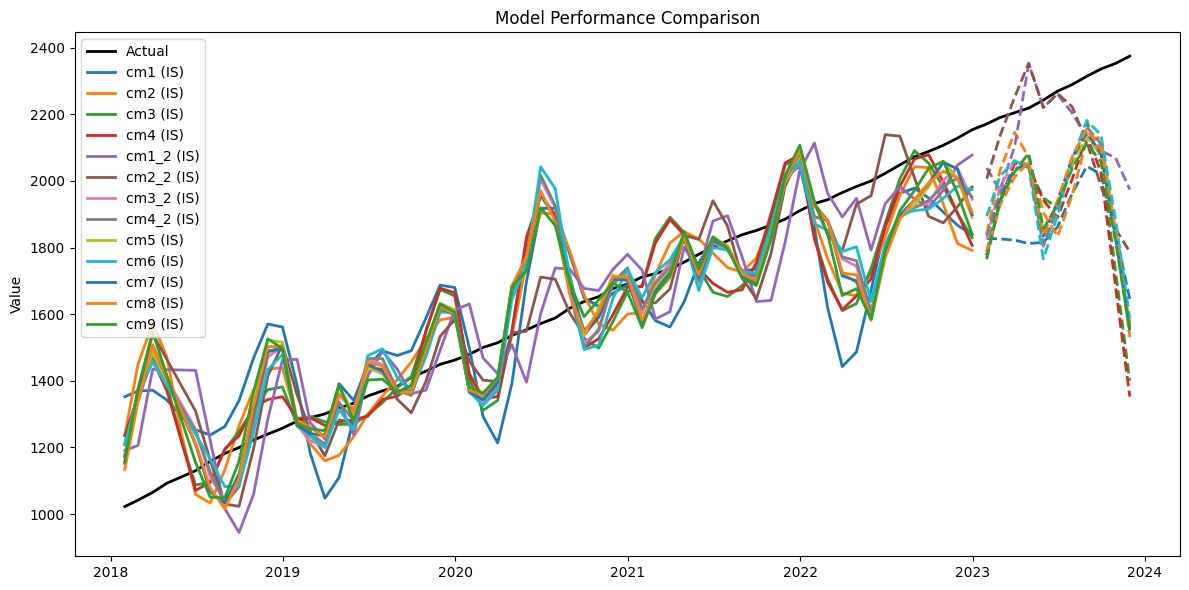


=== Model: cm1 — Testing Metrics ===

--- Fit Measures ---
R²        0.585757
Adj R²    0.578615

--- IS Error Measures ---
ME      522.291195
MAE     169.955421
RMSE    207.529157

--- OOS Error Measures ---
ME      728.482837
MAE     407.558730
RMSE    424.405214

--- In-Sample R² ---
R²    0.585757

--- Common Driver Significance ---
           P-value  Passed
NGDP  6.693432e-08    True

--- Multicollinearity ---
          VIF
Variable     
NGDP      1.0

--- Residual Stationarity ---
       Statistic   P-value  Passed
Test                              
ADF    -0.595801  0.871928   False
PP     -1.757428  0.401793   False
KPSS    0.842360  0.010000   False
ZA           NaN       NaN   False
DFGLS   0.953764  0.918276   False
RUR     1.678293  0.900000    True

--- Residual Normality ---
      Statistic   P-value  Passed
Test                             
JB     1.181627  0.553877    True
SW     0.975336  0.263710    True
KS     0.080475  0.802298    True
CM     0.031041  0.973589   

In [ ]:
seg1.show_report(show_tests=True)

In [ ]:
seg1.searcher.top_cms[0].testset_in.tests[3].thresholds

{'strict': 0.8, 'moderate': 0.7}

### Scenario

In [ ]:
# # Create a Scenario object
# mth_var = [f'M{i}' for i in range(2,5)]
# tsfm_var = [TSFM('PSR', 'GR2')]
# cond_var = CondVar('VR_price', 'VR_balance', BO, {'threshold': vr_95})

# scen_config = {
#     'dm': dm,
#     'model': cm.model_in,
#     'specs': [mth_var, 'NGDP', tsfm_var, cond_var],
#     'P0': '2023-08-31'
# }
# scen = tc.Scenario(**scen_config)
# y_scens = scen.y_scens

In [ ]:
# y_scens['fake_scens']['base'].dropna()

In [ ]:
# y_scens['fake_scens']['adv'].dropna()